In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time

In [ ]:
%%time

#df=pd.read_csv("test.csv")
df=pd.read_csv("metrics.csv")

In [3]:
df.shape

(55147096, 4)

In [4]:
df.head()

,user_id,time,hr,rr
0,828,1442275200755,73,"[0.0,0.0,0.0,0.0,0.0]"
1,828,1442275201755,75,"[0.0,0.0,0.0,0.0,0.0]"
2,828,1442275202755,73,"[0.0,0.0,0.0,0.0,0.0]"
3,828,1442275203755,75,"[0.6399999856948853,0.7799999713897705,0.0,0.0..."
4,828,1442275204755,73,"[0.0,0.0,0.0,0.0,0.0]"


#Functions for Querying HR Data 

In [ ]:
def get_HR(user_id, time_start, time_end):
    '''
    Using a given user_id, a start time, and end time, return a series of heart beats collected every second
    for the user from the start time to the finish. 
    
    time_start = string in format of YY-MM-DD H:M:S, or unix time in milliseconds
    time_end = string in format of YY-MM-DD H:M:S, or unix time in milliseconds
    user_id = an integer representing a unique runner
    
    This can be used to extract the heart rate for a given activity or sleep
    '''
    if (type(time_start)==long) and (type(time_end)==long):
        #if epoch time in milliseconds is entered
        df_subset = df[(df.user_id == user_id) & (df.time >= time_start) & (df.time <= time_end)]
    else:
        #if time is entered in standard time stamp format
        epoch_start = (int(time.mktime(time.strptime(time_start, '%Y-%m-%d %H:%M:%S'))) - 14400)*1000
        epoch_end = (int(time.mktime(time.strptime(time_end, '%Y-%m-%d %H:%M:%S'))) - 14400)*1000
        df_subset = df[(df.user_id == user_id) & (df.time >= epoch_start) & (df.time <= epoch_end)]
    print df_subset.shape
    return df_subset

In [28]:
chris_sleep_df = get_HR(user_id = 2461, time_start=1446522649000, time_end= 1446551079000)

(28473, 4)


In [94]:
chris_run_df = get_HR(user_id=2461,time_start=1446584760000, time_end=1446590460000)

(5707, 4)


In [92]:
def plot_HR(df_subset, is_sleep=True):
    '''
    Using a subset dataframe containing all of the heart rates for an activity, plot the heart rate over time
    Enters:
        df_subset: a subset df of HR data for a given activity
        is_sleep: True if the activity is a sleep, false otherwise. Used for plotting purposes only
    '''
    #df_subset['timestamp'] =  time.strftime("%I:%M:%S", time.localtime(int((df_subset.time)/1000)))
    end_date = str(time.strftime("%b %d %Y", time.localtime((df_subset.time.values[len(df_subset)-1])/1000)))
    print end_date
    plt.plot(df_subset.hr)
    plt.xlabel("Time (s)")
    plt.ylabel("HR")
    if is_sleep==True:
        plt.title("HR During Sleep the Night Before " + end_date)
    else:
        plt.title("HR During Run on " + end_date)

Nov 03 2015


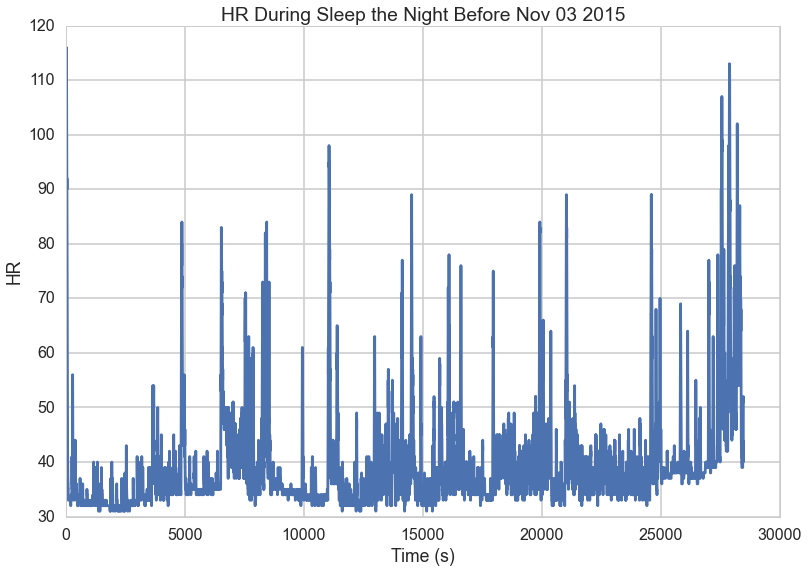

In [93]:
plot_HR(chris_sleep_df)

Nov 03 2015


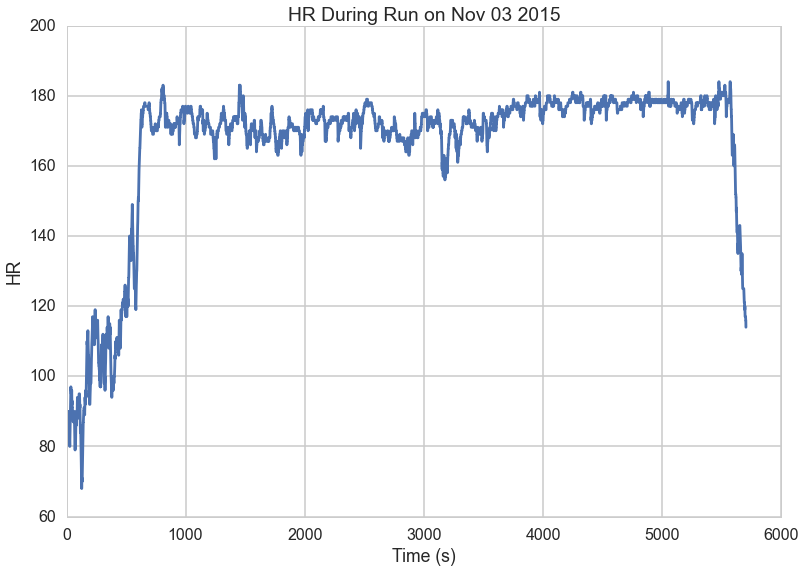

In [95]:
plot_HR(chris_run_df, is_sleep=False)